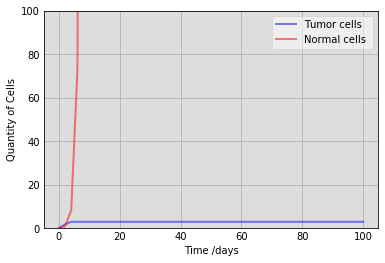

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial number of infected and recovered individuals, I0 and R0.
N10, N20 = 1, 2

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
alpha12, alpha21, k1, k2, r1, r2 = 0.005, 0.1, 60.0, 10.0, 2.2, 1.1

# A grid of time points (in days)
t = np.linspace(0, 100)

# The SIR model differential equations.
def deriv(y, t, r1, r2, alpha12, alpha21, k1, k2):
    N1, N2 = y
    dN1dt = r1*N1*(1-(N1/k1))
    dN2dt = r2*N2*(1-(alpha21/k2)*N1)

    return dN1dt, dN2dt

# Initial conditions vector
y0 = N10, N20
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(r1, r2, alpha12, alpha12, k1, k2))
N1, N2 = ret.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, N1/20, 'b', alpha=0.5, lw=2, label='Tumor cells')
ax.plot(t, N2/20, 'r', alpha=0.5, lw=2, label='Normal cells ')

ax.set_xlabel('Time /days')
ax.set_ylabel('Quantity of Cells')
ax.set_ylim(0, 100.0)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
plt.grid()
plt.show()